
# 3. Machine Learning


## 3.3 Association Rule

In [2]:
%%capture
%run "PKL - Main (Read Preprocess Visual).ipynb"
!pip install apyori
!pip install openpyxl
import openpyxl
import matplotlib.pyplot as plt

### 3.3.1 Apriori

In [3]:
df_dass_new_asc = df_dass_new.drop(df_dass_new.iloc[:,1:23].columns, axis=1)
df_erq_new_asc = df_erq_new.drop(df_erq_new.iloc[:,1:12].columns, axis=1)
df_aeq_new_asc = df_aeq_new.drop(df_aeq_new.iloc[:,1:66].columns, axis=1)
df_nilai_new_asc = df_nilai_new.drop("Mata Kuliah", axis=1)

df_dass_new_asc['Depression'] = df_dass_new_asc['Depression'].replace(['Normal','Mild','Moderate','Severe','Extremely Severe'],['Normal Depression','Mild Depression','Moderate Depression', 'Severe Depression','Extremely Severe Depression'])
df_dass_new_asc['Anxiety'] = df_dass_new_asc['Anxiety'].replace(['Normal','Mild','Moderate','Severe','Extremely Severe'],['Normal Anxiety','Mild Anxiety','Moderate Anxiety', 'Severe Anxiety','Extremely Severe Anxiety'])
df_dass_new_asc['Stress'] = df_dass_new_asc['Stress'].replace(['Normal','Mild','Moderate','Severe','Extremely Severe'],['Normal Stress','Mild Stress','Moderate Stress', 'Severe Stress','Extremely Severe Stress'])

df_aeq_new_asc['Class_Positive'] = df_aeq_new_asc['Class_Positive'].replace(['Low','Moderate','High'],['Low CP','Moderate CP','High CP'])
df_aeq_new_asc['Class_Negative'] = df_aeq_new_asc['Class_Negative'].replace(['Low','Moderate','High'],['Low CN','Moderate CN','High CN'])
df_aeq_new_asc['Test_Positive'] = df_aeq_new_asc['Test_Positive'].replace(['Low','Moderate','High'],['Low TP','Moderate TP','High TP'])
df_aeq_new_asc['Test_Negative'] = df_aeq_new_asc['Test_Negative'].replace(['Low','Moderate','High'],['Low TN','Moderate TN','High TN'])

df_erq_new_asc['CRF'] = df_erq_new_asc['CRF'].replace(['High','Moderate','Low'],['High CRF','Moderate CRF','Low CRF'])
df_erq_new_asc['ESF'] = df_erq_new_asc['ESF'].replace(['High','Moderate','Low'],['High ESF','Moderate ESF','Low ESF'])

In [4]:
df_asc = df_aeq_new_asc.copy()
df_asc = df_asc.merge(df_dass_new_asc, on='NIM', how='left')
df_asc = df_asc.merge(df_erq_new_asc, on='NIM', how='left')
df_asc = df_asc.merge(df_nilai_new_asc, on='NIM', how='left')
df_asc.shape

(202, 13)

In [5]:
df_asc

,NIM,Class_Positive,Class_Negative,Test_Positive,Test_Negative,Depression,Anxiety,Stress,CRF,ESF,nilai_pretest,nilai_posttest,delta
0,205150207111012,Moderate CP,Low CN,High TP,Low TN,Normal Depression,Normal Anxiety,Normal Stress,Moderate CRF,Moderate ESF,High PreTest,High PostTest,Positive Delta
1,205150200111037,Moderate CP,Low CN,High TP,Low TN,Normal Depression,Normal Anxiety,Normal Stress,Moderate CRF,High ESF,High PreTest,High PostTest,Negative Delta
2,205150200111025,Moderate CP,Moderate CN,Moderate TP,Moderate TN,Normal Depression,Mild Anxiety,Normal Stress,Moderate CRF,Moderate ESF,High PreTest,High PostTest,Positive Delta
3,205150200111067,High CP,Low CN,High TP,Low TN,Normal Depression,Normal Anxiety,Normal Stress,Moderate CRF,Moderate ESF,High PreTest,High PostTest,Positive Delta
4,205150201111016,High CP,Low CN,Moderate TP,Low TN,Normal Depression,Normal Anxiety,Normal Stress,Moderate CRF,Moderate ESF,High PreTest,High PostTest,Negative Delta
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,195150200111028,High CP,Low CN,High TP,Low TN,Normal Depression,Normal Anxiety,Normal Stress,High CRF,Moderate ESF,High PreTest,High PostTest,Positive Delta
198,205150601111004,High CP,Low CN,High TP,Low TN,Normal Depression,Mild Anxiety,Normal Stress,High CRF,Moderate ESF,High PreTest,High PostTest,Positive Delta
199,205150407111030,High CP,Low CN,High TP,Low TN,Normal Depression,Normal Anxiety,Normal Stress,Moderate CRF,Moderate ESF,High PreTest,High PostTest,Positive Delta
200,205150607111006,High CP,Low CN,High TP,Moderate TN,Moderate Depression,Moderate Anxiety,Normal Stress,Moderate CRF,High ESF,High PreTest,Moderate PostTest,Negative Delta


In [6]:
from apyori import apriori
# Dokumentasi https://zaxrosenberg.com/unofficial-apyori-documentation/
n_data = len(df_asc)
print(n_data)

202


In [7]:
#Fungsi untuk menampilkan rule dalam bentuk asosiasi (yg pake panah2 gitu)
def rule_desc(rule,desc):
    for i in range(len(rule)):
        LHS=str(rule["Antecedents"])
        desc.loc[i,"Rule"]=str(rule.loc[i,"Antecedents"])+' --> '+str(rule.loc[i,"Consequents"])
    return desc

rule_label=["Rule"]

In [8]:
data = []
for i in range(0,n_data):
    data.append([str(df_asc.values[i,j]) for j in range(1,13)])
data

[['Moderate CP',
  'Low CN',
  'High TP',
  'Low TN',
  'Normal Depression',
  'Normal Anxiety',
  'Normal Stress',
  'Moderate CRF',
  'Moderate ESF',
  'High PreTest',
  'High PostTest',
  'Positive Delta'],
 ['Moderate CP',
  'Low CN',
  'High TP',
  'Low TN',
  'Normal Depression',
  'Normal Anxiety',
  'Normal Stress',
  'Moderate CRF',
  'High ESF',
  'High PreTest',
  'High PostTest',
  'Negative Delta'],
 ['Moderate CP',
  'Moderate CN',
  'Moderate TP',
  'Moderate TN',
  'Normal Depression',
  'Mild Anxiety',
  'Normal Stress',
  'Moderate CRF',
  'Moderate ESF',
  'High PreTest',
  'High PostTest',
  'Positive Delta'],
 ['High CP',
  'Low CN',
  'High TP',
  'Low TN',
  'Normal Depression',
  'Normal Anxiety',
  'Normal Stress',
  'Moderate CRF',
  'Moderate ESF',
  'High PreTest',
  'High PostTest',
  'Positive Delta'],
 ['High CP',
  'Low CN',
  'Moderate TP',
  'Low TN',
  'Normal Depression',
  'Normal Anxiety',
  'Normal Stress',
  'Moderate CRF',
  'Moderate ESF',
  'H

##### Penjelasan:
Kode program diatas berfungsi untuk membuat sebuah kumpulan respon kuesioner dari setiap mahasiswa yakni dari AEQ, DASS, ERQ, serta nilai pretest dan posttest ke dalam bentuk transaksi yang bertipe list. Masing-masing mahasiswa memiliki 12 fitur.

In [9]:
association_rules = apriori(data,min_support=0.003,min_confidence=0.02,min_lift=1,max_length=5)
association_results=list(association_rules)
print(len(association_results))

44003


##### Penjelasan:
Kode program diatas adalah kode untuk membuat pola asosiasi dengan menggunakan library apyori. Pada kode tersebut hasil terbaik diperoleh ketika nilai minimal supportnya 0.003 dan minimal confidencenya 0.02. Untuk nilai maximum length atau panjang antecedent maksimumnya adalah 5 karena jika nilai max length lebih dari 5 maka instance notebook akan kehabisan memori. Dari penjalanan kode tersebut diperoleh rule sebanyak 44003, namun rule sebanyak ini masih perlu disaring agar hanya hal penting saja yang diperoleh.

In [10]:
association_results

[RelationRecord(items=frozenset({'High CP'}), support=0.6732673267326733, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'High CP'}), confidence=0.6732673267326733, lift=1.0)]),
 RelationRecord(items=frozenset({'High CRF'}), support=0.18316831683168316, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'High CRF'}), confidence=0.18316831683168316, lift=1.0)]),
 RelationRecord(items=frozenset({'High ESF'}), support=0.09900990099009901, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'High ESF'}), confidence=0.09900990099009901, lift=1.0)]),
 RelationRecord(items=frozenset({'High PostTest'}), support=0.9356435643564357, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'High PostTest'}), confidence=0.9356435643564357, lift=1.0)]),
 RelationRecord(items=frozenset({'High PreTest'}), support=0.7376237623762376, ordered_statistics=[OrderedStatistic(items_base=f

##### Penjelasan:
Tampilan diatas adalah tampilan dari variabel association_results, 

In [11]:
from collections import Counter
hasil_general=[]
def extract(item):
    for item in association_results:
        pair=item[0]
        items=[x for x in pair]
        low = frozenset(["Low PreTest"])
        moderate = frozenset(['Moderate PreTest'])
        high = frozenset(['High PreTest'])

        consq = list(item[2][0][1])
        n_item = len(consq)
        print(len(pair))
        LHS=list(item[2][0][0])
        support=float(item[1])
        conf=float(item[2][0][2])
        lift=float(item[2][0][3])
       
        if(n_item==1 and lift>1):
            RHS=list(item[2][0][1])
            rows=(LHS,RHS,support,conf,lift)
            hasil_general.append(rows)
        else:
            continue
        
    return hasil_general

label=["Antecedents","Consequents","Support","Confidence","Lift"]
apriori_general = pd.DataFrame(extract(association_results), columns = label)
apriori_general = apriori_general.sort_values(["Lift","Confidence"], ascending=False)
apriori_general["Consequents"] = pd.Series(apriori_general["Consequents"], dtype="string")

5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


In [12]:
apriori_general["Consequents"].unique()

<StringArray>
[            "['High TN']",     "['Moderate Stress']",
      "['Severe Anxiety']",   "['Severe Depression']",
         "['Mild Stress']", "['Moderate Depression']",
   "['Moderate PostTest']",              "['Low TP']",
    "['Moderate PreTest']",    "['Moderate Anxiety']",
            "['High CRF']",         "['Moderate TP']",
            "['High ESF']",         "['Moderate CP']",
     "['Mild Depression']",         "['Moderate CN']",
         "['Moderate TN']",      "['Normal Anxiety']",
             "['Low ESF']",        "['Mild Anxiety']",
              "['Low TN']",      "['Negative Delta']",
              "['Low CN']",             "['High CP']",
             "['High TP']",   "['Normal Depression']",
        "['High PreTest']",      "['Positive Delta']",
        "['Moderate CRF']",        "['Moderate ESF']",
       "['Normal Stress']",       "['High PostTest']"]
Length: 32, dtype: string

In [13]:
apriori_general

,Antecedents,Consequents,Support,Confidence,Lift
2,[High CN],['High TN'],0.014851,1.000000,33.666667
9,[High CN],['Moderate Stress'],0.004950,0.333333,22.444444
54,[Low PreTest],['Severe Anxiety'],0.004950,1.000000,12.625000
85,[Severe Anxiety],['Severe Depression'],0.004950,0.062500,12.625000
38,[High TN],['Moderate Stress'],0.004950,0.166667,11.222222
...,...,...,...,...,...
31,[High TN],['Mild Depression'],0.004950,0.166667,1.020202
241,"[Positive Delta, Moderate PostTest]",['Moderate CN'],0.004950,0.333333,1.004975
413,"[Moderate CP, High CRF, Positive Delta]",['Moderate CN'],0.004950,0.333333,1.004975
605,"[High PreTest, Normal Anxiety, Low ESF]",['Moderate CN'],0.004950,0.333333,1.004975


In [14]:
ap_general = apriori_general["Consequents"].value_counts().rename_axis('Consequents').reset_index(name='counts')
#ap_general['Consequents']= ap_general['Consequents'].str[2:-2]
ap_general

,Consequents,counts
0,['High PostTest'],376
1,['Normal Stress'],254
2,['Positive Delta'],180
3,['Moderate ESF'],145
4,['Moderate CRF'],121
5,['High PreTest'],107
6,['High TP'],96
7,['Normal Depression'],74
8,['High CP'],57
9,['Low CN'],56


In [15]:
hasil_pretest=[]

def extract(item):
    for item in association_results:
        pair=item[0]
        items=[x for x in pair]
        low = frozenset(["Low PreTest"])
        moderate = frozenset(['Moderate PreTest'])
        high = frozenset(['High PreTest'])

        #print(item[2][0][0]) #itembase
        #print(item[2][0][1]) #item add
        #rule : item base -> item add

        LHS=list(item[2][0][0])
        support=float(item[1])
        conf=float(item[2][0][2])
        lift=float(item[2][0][3])
       
        if (item[2][0][1]==low and lift>1):
            RHS=list(item[2][0][1])
            rows=(LHS,RHS,support,conf,lift)
            hasil_pretest.append(rows)
        elif (item[2][0][1]==moderate and lift>1):
            RHS=list(item[2][0][1])
            rows=(LHS,RHS,support,conf,lift)
            hasil_pretest.append(rows)
        elif (item[2][0][1]==high and lift>1):
            RHS=list(item[2][0][1])
            rows=(LHS,RHS,support,conf,lift)
            hasil_pretest.append(rows)
        else:
            continue
        
    return hasil_pretest

label=["Antecedents","Consequents","Support","Confidence","Lift"]
apriori_pretest = pd.DataFrame(extract(association_results), columns = label)
apriori_pretest = apriori_pretest.sort_values(["Lift","Confidence"], ascending=False)
apriori_pretest["Consequents"] = pd.Series(apriori_pretest["Consequents"], dtype="string")
# apriori_pretest["Consequents"]= apriori_pretest["Consequents"].replace(["['Moderate PreTest']"],'Moderate PreTest')
# apriori_pretest["Consequents"]= apriori_pretest["Consequents"].replace(["['High PreTest']"],'High PreTest')

In [16]:
apriori_pretest

,Antecedents,Consequents,Support,Confidence,Lift
12,"[Mild Stress, Low TN]",['Moderate PreTest'],0.004950,1.000000,3.884615
26,"[High CRF, Low CN, Moderate TP]",['Moderate PreTest'],0.004950,1.000000,3.884615
13,"[Severe Anxiety, Low TN]",['Moderate PreTest'],0.004950,0.500000,1.942308
1,[Low TP],['High PreTest'],0.009901,1.000000,1.355705
2,[Severe Depression],['High PreTest'],0.004950,1.000000,1.355705
...,...,...,...,...,...
52,"[Moderate CRF, Low CN, Severe Anxiety]",['Moderate PreTest'],0.004950,0.333333,1.294872
53,"[Severe Anxiety, Low CN, Moderate ESF]",['Moderate PreTest'],0.004950,0.333333,1.294872
54,"[Normal Anxiety, Low CN, Moderate TN]",['Moderate PreTest'],0.004950,0.333333,1.294872
65,"[High CP, Low CN, Moderate TP, Moderate ESF]",['Moderate PreTest'],0.004950,0.333333,1.294872


In [17]:
dict_pre= {}
dict_pre['Low PreTest'] = 0
dict_pre['Moderate PreTest'] = 0
dict_pre['High PreTest'] = 0

dict_pre_ct = dict_pre.copy()
dict_pre_ct.update(apriori_pretest["Consequents"].value_counts().to_dict())
dict_pre_ct = {key:value for (key, value) in dict_pre_ct.items() if value is not 0}
dict_pre_ct

{"['High PreTest']": 107, "['Moderate PreTest']": 13}

In [18]:
hasil_posttest=[]

def extract(item):
    for item in association_results:
        pair=item[0]
        items=[x for x in pair]
        low = frozenset(["Low PostTest"])
        moderate = frozenset(['Moderate PostTest'])
        high = frozenset(['High PostTest'])

        #print(item[2][0][0]) itembase
        #print(item[2][0][1]) item add
        #rule : item base -> item add

        LHS=list(item[2][0][0])
        support=float(item[1])
        conf=float(item[2][0][2])
        lift=float(item[2][0][3])
       
        if (item[2][0][1]==low and lift>1):
            RHS=list(item[2][0][1])
            rows=(LHS,RHS,support,conf,lift)
            hasil_posttest.append(rows)
        elif (item[2][0][1]==moderate and lift>1):
            RHS=list(item[2][0][1])
            rows=(LHS,RHS,support,conf,lift)
            hasil_posttest.append(rows)
        elif (item[2][0][1]==high and lift>1):
            RHS=list(item[2][0][1])
            rows=(LHS,RHS,support,conf,lift)
            hasil_posttest.append(rows)
        else:
            continue
        
    return hasil_posttest

label=["Antecedents","Consequents","Support","Confidence","Lift"]
apriori_posttest = pd.DataFrame(extract(association_results), columns = label)
apriori_posttest = apriori_posttest.sort_values(["Lift","Confidence"], ascending=False)
apriori_posttest["Consequents"] = pd.Series(apriori_posttest["Consequents"], dtype="string")
# apriori_posttest["Consequents"]= apriori_posttest["Consequents"].replace(["['Moderate PostTest']"],'Moderate PostTest')

In [19]:
dict_pos= {}
dict_pos['Low PostTest'] = 0
dict_pos['Moderate PostTest'] = 0
dict_pos['High PostTest'] = 0

dict_pos_ct = dict_pos.copy()
dict_pos_ct.update(apriori_posttest["Consequents"].value_counts().to_dict())
dict_pos_ct = {key:value for (key, value) in dict_pos_ct.items() if value is not 0}
dict_pos_ct

{"['High PostTest']": 376, "['Moderate PostTest']": 7}

In [20]:
hasil_delta=[]

def extract(item):
    for item in association_results:
        pair=item[0]
        items=[x for x in pair]
        low = frozenset(["Negative Delta"])
        moderate = frozenset(['Neutral Delta'])
        high = frozenset(['Positive Delta'])

        #print(item[2][0][0]) itembase
        #print(item[2][0][1]) item add
        #rule : item base -> item add

        LHS=list(item[2][0][0])
        support=float(item[1])
        conf=float(item[2][0][2])
        lift=float(item[2][0][3])
       
        if (item[2][0][1]==low and lift>1):
            RHS=list(item[2][0][1])
            rows=(LHS,RHS,support,conf,lift)
            hasil_delta.append(rows)
        elif (item[2][0][1]==moderate and lift>1):
            RHS=list(item[2][0][1])
            rows=(LHS,RHS,support,conf,lift)
            hasil_delta.append(rows)
        elif (item[2][0][1]==high and lift>1):
            RHS=list(item[2][0][1])
            rows=(LHS,RHS,support,conf,lift)
            hasil_delta.append(rows)
        else:
            continue
        
    return hasil_delta

label=["Antecedents","Consequents","Support","Confidence","Lift"]
apriori_delta = pd.DataFrame(extract(association_results), columns = label)
apriori_delta = apriori_delta.sort_values(["Lift","Confidence"], ascending=False)
apriori_delta["Consequents"] = pd.Series(apriori_delta["Consequents"], dtype="string")
# apriori_delta["Consequents"]= apriori_delta["Consequents"].replace(["['Negative Delta']"],'Negative Delta')
# apriori_delta["Consequents"]= apriori_delta["Consequents"].replace(["['Neutral Delta']"],'Neutral Delta')
# apriori_delta["Consequents"] = apriori_delta["Consequents"].replace(["['Positive Delta']"],'Positive Delta')

In [21]:
dict_dlt= {}
dict_dlt['Negative Delta'] = 0
dict_dlt['Neutral Delta'] = 0
dict_dlt['Positive Delta'] = 0

dict_dlt_ct = dict_pos.copy()
dict_dlt_ct.update(apriori_delta["Consequents"].value_counts().to_dict())
dict_dlt_ct = {key:value for (key, value) in dict_dlt_ct.items() if value is not 0}
dict_dlt_ct

{"['Positive Delta']": 180, "['Negative Delta']": 1}

In [22]:
apriori_delta["Consequents"].unique()

<StringArray>
["['Negative Delta']", "['Positive Delta']"]
Length: 2, dtype: string

In [23]:
apriori_delta

,Antecedents,Consequents,Support,Confidence,Lift
0,[High CN],['Negative Delta'],0.004950,0.333333,1.683333
1,[Low PreTest],['Positive Delta'],0.004950,1.000000,1.246914
2,[Low TP],['Positive Delta'],0.009901,1.000000,1.246914
3,[Moderate Stress],['Positive Delta'],0.014851,1.000000,1.246914
4,"[High PostTest, High CN]",['Positive Delta'],0.009901,1.000000,1.246914
...,...,...,...,...,...
176,"[Moderate TP, Low TN, Moderate Anxiety, Modera...",['Positive Delta'],0.004950,1.000000,1.246914
177,"[Moderate CN, Moderate CRF, Mild Depression, N...",['Positive Delta'],0.004950,1.000000,1.246914
178,"[Moderate CN, Moderate PreTest, Moderate Anxie...",['Positive Delta'],0.004950,1.000000,1.246914
179,"[Moderate CP, Moderate PreTest, Moderate Anxie...",['Positive Delta'],0.004950,1.000000,1.246914


#### Visualisasi

##### Tampilan Rule

In [24]:
rule_ap_general = pd.DataFrame(columns = rule_label)
rule_ap_general = rule_desc(apriori_general,rule_ap_general)
rule_ap_pretest = pd.DataFrame(columns = rule_label)
rule_ap_pretest = rule_desc(apriori_pretest,rule_ap_pretest)
rule_ap_posttest = pd.DataFrame(columns = rule_label)
rule_ap_posttest = rule_desc(apriori_posttest,rule_ap_posttest)
rule_ap_delta = pd.DataFrame(columns = rule_label)
rule_ap_delta = rule_desc(apriori_delta,rule_ap_delta)

In [25]:
rule_ap_pretest

,Rule
0,['High CN'] --> ['Moderate PreTest']
1,['Low TP'] --> ['High PreTest']
2,['Severe Depression'] --> ['High PreTest']
3,['Moderate PostTest'] --> ['Moderate PreTest']
4,['Moderate Stress'] --> ['Moderate PreTest']
...,...
115,"['Negative Delta', 'Low CN', 'Moderate Anxiety..."
116,"['Negative Delta', 'Moderate CRF', 'Mild Anxie..."
117,"['Mild Depression', 'Moderate TP', 'Low TN', '..."
118,"['Moderate CP', 'Low TN', 'Moderate Anxiety', ..."


In [26]:
rule_ap_posttest

,Rule
0,['High CN'] --> ['Moderate PostTest']
1,['High CRF'] --> ['Moderate PostTest']
2,['High ESF'] --> ['Moderate PostTest']
3,['Low PreTest'] --> ['High PostTest']
4,['Low TP'] --> ['High PostTest']
...,...
378,"['Severe Anxiety', 'Moderate TP', 'Moderate ES..."
379,"['Positive Delta', 'Severe Anxiety', 'Moderate..."
380,"['Positive Delta', 'Severe Anxiety', 'Moderate..."
381,"['Positive Delta', 'Severe Anxiety', 'Moderate..."


In [27]:
rule_ap_delta

,Rule
0,['High CN'] --> ['Negative Delta']
1,['Low PreTest'] --> ['Positive Delta']
2,['Low TP'] --> ['Positive Delta']
3,['Moderate Stress'] --> ['Positive Delta']
4,"['High PostTest', 'High CN'] --> ['Positive De..."
...,...
176,"['Moderate TP', 'Low TN', 'Moderate Anxiety', ..."
177,"['Moderate CN', 'Moderate CRF', 'Mild Depressi..."
178,"['Moderate CN', 'Moderate PreTest', 'Moderate ..."
179,"['Moderate CP', 'Moderate PreTest', 'Moderate ..."


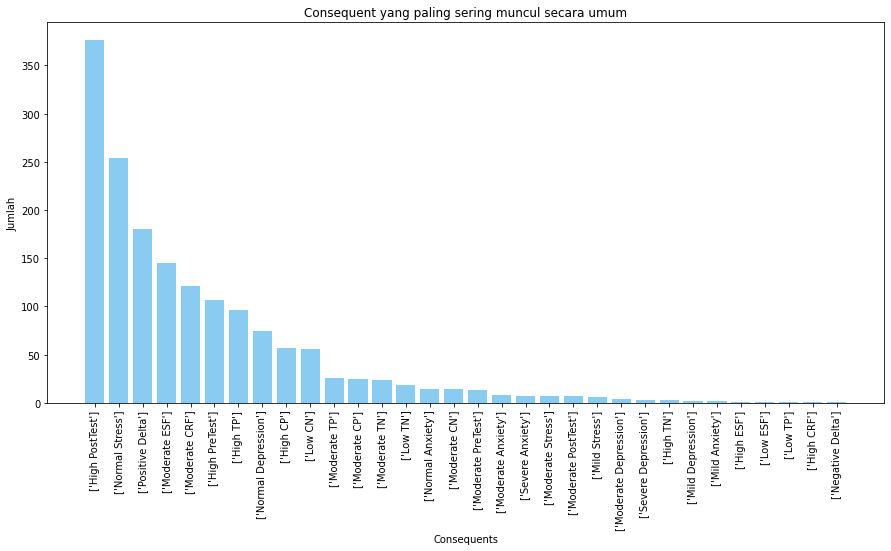

In [28]:
plt.figure(figsize=(15,7))
plt.bar(ap_general["Consequents"], ap_general["counts"], align='center', color="#8ACCF1")
plt.xticks(rotation=90)
plt.xlabel('Consequents')
plt.ylabel('Jumlah')
plt.title('Consequent yang paling sering muncul secara umum')

plt.show()

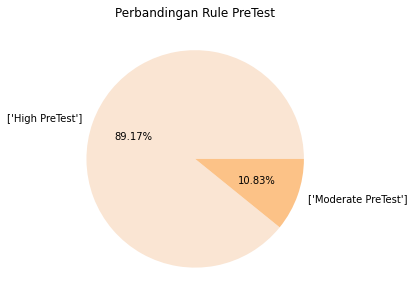

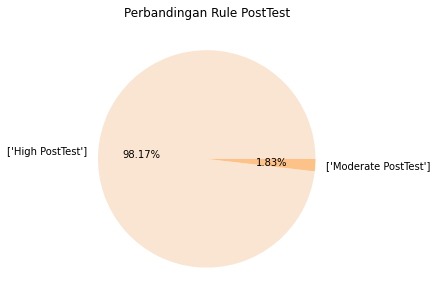

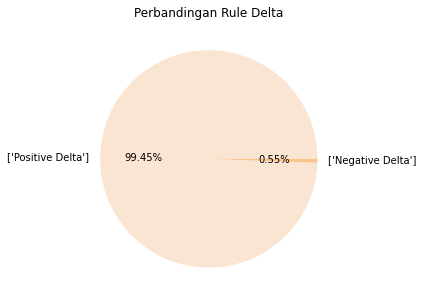

In [29]:
labels_pre_ap = list(dict_pre_ct.keys())
values_pre_ap = list(dict_pre_ct.values())
labels_pos_ap = list(dict_pos_ct.keys())
values_pos_ap = list(dict_pos_ct.values())
labels_dlt_ap = list(dict_dlt_ct.keys())
values_dlt_ap = list(dict_dlt_ct.values())

colors=["#FAE5D3","#FCC287","#E16162", "#6A8D73","#8ACCF1","#CEDCBA","#49F6AC"]
plt.figure(figsize=(15,5))
plt.title('Perbandingan Rule PreTest')
plt.pie(values_pre_ap, labels=labels_pre_ap,autopct='%1.2f%%',colors=colors)
plt.show()

plt.figure(figsize=(15,5))
plt.title('Support vs Confidence')
plt.title('Perbandingan Rule PostTest')
plt.pie(values_pos_ap, labels=labels_pos_ap,autopct='%1.2f%%',colors=colors)
plt.show()

plt.figure(figsize=(15,5))
plt.title('Perbandingan Rule Delta')
plt.pie(values_dlt_ap, labels=labels_dlt_ap,autopct='%1.2f%%',colors=colors)
plt.show()

In [30]:
dict_pre_ct

{"['High PreTest']": 107, "['Moderate PreTest']": 13}

In [31]:
d1 = pd.DataFrame(dict_pre_ct.items(), columns=['Consequents', 'Jumlah'])
d2 = pd.DataFrame(dict_pos_ct.items(), columns=['Consequents', 'Jumlah'])
d3 = pd.DataFrame(dict_dlt_ct.items(), columns=['Consequents', 'Jumlah'])
ap_vis = d1.copy()
ap_vis = ap_vis.append(d2)
ap_vis = ap_vis.append(d3)
ap_vis

,Consequents,Jumlah
0,['High PreTest'],107
1,['Moderate PreTest'],13
0,['High PostTest'],376
1,['Moderate PostTest'],7
0,['Positive Delta'],180
1,['Negative Delta'],1


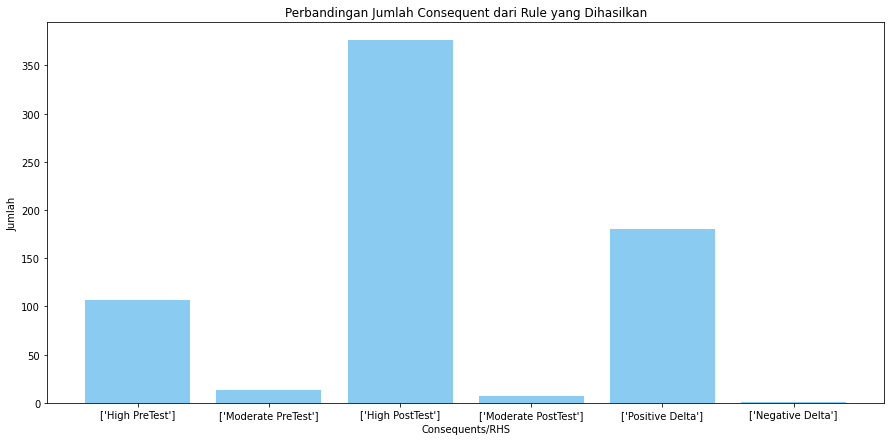

In [32]:
plt.figure(figsize=(15,7))
plt.bar(ap_vis["Consequents"], ap_vis["Jumlah"], align='center', color="#8ACCF1")
plt.xlabel('Consequents/RHS')
plt.ylabel('Jumlah')
plt.title('Perbandingan Jumlah Consequent dari Rule yang Dihasilkan')

plt.show()

In [33]:
combinesion = apriori_pretest.copy()
combinesion = combinesion.append(apriori_posttest)
combinesion = combinesion.append(apriori_delta)

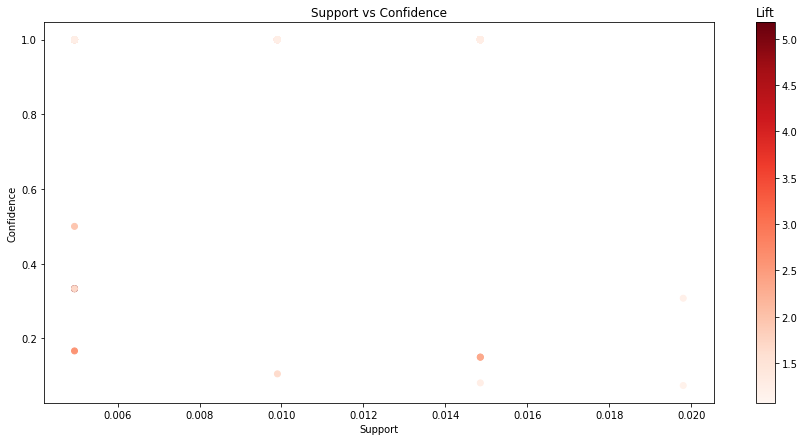

In [34]:
#Visualisasi
plt.figure(figsize=(15,7))
plt.scatter(combinesion['Support'], combinesion['Confidence'],c=combinesion['Lift'],cmap="Reds")
yeet = plt.colorbar()
yeet.ax.set_title('Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

### 3.3.2 FP-Growth

In [35]:
df_asc_fp = pd.DataFrame()
df_asc_fp["NIM"] =df_asc["NIM"].copy()

# AEQ
df_asc_fp["High CP"]=False
df_asc_fp["Moderate CP"]=False
df_asc_fp["Low CP"]=False
df_asc_fp["High CN"]=False
df_asc_fp["Moderate CN"]=False
df_asc_fp["Low CN"]=False
df_asc_fp["High TP"]=False
df_asc_fp["Moderate TP"]=False
df_asc_fp["Low TP"]=False
df_asc_fp["High TN"]=False
df_asc_fp["Moderate TN"]=False
df_asc_fp["Low TN"]=False

# DASS
df_asc_fp["Normal Depression"]=False
df_asc_fp["Mild Depression"]=False
df_asc_fp["Moderate Depression"]=False
df_asc_fp["Severe Depression"]=False
df_asc_fp["Extremely Severe Depression"]=False
df_asc_fp["Normal Anxiety"]=False
df_asc_fp["Mild Anxiety"]=False
df_asc_fp["Moderate Anxiety"]=False
df_asc_fp["Severe Anxiety"]=False
df_asc_fp["Extremely Severe Anxiety"]=False
df_asc_fp["Normal Stress"]=False
df_asc_fp["Mild Stress"]=False
df_asc_fp["Moderate Stress"]=False
df_asc_fp["Severe Stress"]=False
df_asc_fp["Extremely Severe Stress"]=False

# ERQ
df_asc_fp["High CRF"]=False
df_asc_fp["Moderate CRF"]=False
df_asc_fp["Low CRF"]=False
df_asc_fp["High ESF"]=False
df_asc_fp["Moderate ESF"]=False
df_asc_fp["Low ESF"]=False

# NILAI
df_asc_fp["Low PreTest"]=False
df_asc_fp["Moderate PreTest"]=False
df_asc_fp["High PreTest"]=False
df_asc_fp["Low PostTest"]=False
df_asc_fp["Moderate PostTest"]=False
df_asc_fp["High PostTest"]=False
df_asc_fp["Negative Delta"]=False
df_asc_fp["Neutral Delta"]=False
df_asc_fp["Positive Delta"]=False

In [36]:
df_asc_fp

,NIM,High CP,Moderate CP,Low CP,High CN,Moderate CN,Low CN,High TP,Moderate TP,Low TP,...,Low ESF,Low PreTest,Moderate PreTest,High PreTest,Low PostTest,Moderate PostTest,High PostTest,Negative Delta,Neutral Delta,Positive Delta
0,205150207111012,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,205150200111037,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,205150200111025,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,205150200111067,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,205150201111016,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,195150200111028,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,205150601111004,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199,205150407111030,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
200,205150607111006,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
df_asc

,NIM,Class_Positive,Class_Negative,Test_Positive,Test_Negative,Depression,Anxiety,Stress,CRF,ESF,nilai_pretest,nilai_posttest,delta
0,205150207111012,Moderate CP,Low CN,High TP,Low TN,Normal Depression,Normal Anxiety,Normal Stress,Moderate CRF,Moderate ESF,High PreTest,High PostTest,Positive Delta
1,205150200111037,Moderate CP,Low CN,High TP,Low TN,Normal Depression,Normal Anxiety,Normal Stress,Moderate CRF,High ESF,High PreTest,High PostTest,Negative Delta
2,205150200111025,Moderate CP,Moderate CN,Moderate TP,Moderate TN,Normal Depression,Mild Anxiety,Normal Stress,Moderate CRF,Moderate ESF,High PreTest,High PostTest,Positive Delta
3,205150200111067,High CP,Low CN,High TP,Low TN,Normal Depression,Normal Anxiety,Normal Stress,Moderate CRF,Moderate ESF,High PreTest,High PostTest,Positive Delta
4,205150201111016,High CP,Low CN,Moderate TP,Low TN,Normal Depression,Normal Anxiety,Normal Stress,Moderate CRF,Moderate ESF,High PreTest,High PostTest,Negative Delta
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,195150200111028,High CP,Low CN,High TP,Low TN,Normal Depression,Normal Anxiety,Normal Stress,High CRF,Moderate ESF,High PreTest,High PostTest,Positive Delta
198,205150601111004,High CP,Low CN,High TP,Low TN,Normal Depression,Mild Anxiety,Normal Stress,High CRF,Moderate ESF,High PreTest,High PostTest,Positive Delta
199,205150407111030,High CP,Low CN,High TP,Low TN,Normal Depression,Normal Anxiety,Normal Stress,Moderate CRF,Moderate ESF,High PreTest,High PostTest,Positive Delta
200,205150607111006,High CP,Low CN,High TP,Moderate TN,Moderate Depression,Moderate Anxiety,Normal Stress,Moderate CRF,High ESF,High PreTest,Moderate PostTest,Negative Delta


In [38]:
# AEQ
for i in range (len(df_asc)):
    if(df_asc.loc[i,"Class_Positive"]=="High CP"):
        df_asc_fp.loc[i,"High CP"]=True
    elif(df_asc.loc[i,"Class_Positive"]=="Moderate CP"):
        df_asc_fp.loc[i,"Moderate CP"]=True
    elif(df_asc.loc[i,"Class_Positive"]=="Low CP"):
        df_asc_fp.loc[i,"Low CP"]=True

    if(df_asc.loc[i,"Class_Negative"]=="High CN"):
        df_asc_fp.loc[i,"High CN"]=True
    elif(df_asc.loc[i,"Class_Negative"]=="Moderate CN"):
        df_asc_fp.loc[i,"Moderate CN"]=True
    elif(df_asc.loc[i,"Class_Negative"]=="Low CN"):
        df_asc_fp.loc[i,"Low CN"]=True

    if(df_asc.loc[i,"Test_Positive"]=="High TP"):
        df_asc_fp.loc[i,"High TP"]=True
    elif(df_asc.loc[i,"Test_Positive"]=="Moderate TP"):
        df_asc_fp.loc[i,"Moderate TP"]=True
    elif(df_asc.loc[i,"Test_Positive"]=="Low TP"):
        df_asc_fp.loc[i,"Low TP"]=True

    if(df_asc.loc[i,"Test_Negative"]=="High TN"):
        df_asc_fp.loc[i,"High TN"]=True
    elif(df_asc.loc[i,"Test_Negative"]=="Moderate TN"):
        df_asc_fp.loc[i,"Moderate TN"]=True
    elif(df_asc.loc[i,"Test_Negative"]=="Low TN"):
        df_asc_fp.loc[i,"Low TN"]=True

# DASS
for i in range (len(df_asc)):
    if(df_asc.loc[i,"Depression"]=="Normal Depression"):
        df_asc_fp.loc[i,"Normal Depression"]=True
    elif(df_asc.loc[i,"Depression"]=="Mild Depression"):
        df_asc_fp.loc[i,"Mild Depression"]=True
    elif(df_asc.loc[i,"Depression"]=="Moderate Depression"):
        df_asc_fp.loc[i,"Moderate Depression"]=True
    elif(df_asc.loc[i,"Depression"]=="Severe Depression"):
        df_asc_fp.loc[i,"Severe Depression"]=True
    elif(df_asc.loc[i,"Depression"]=="Extremely Severe Depression"):
        df_asc_fp.loc[i,"Extremely Severe Depression"]=True

    if(df_asc.loc[i,"Anxiety"]=="Normal Anxiety"):
        df_asc_fp.loc[i,"Normal Anxiety"]=True
    elif(df_asc.loc[i,"Anxiety"]=="Mild Anxiety"):
        df_asc_fp.loc[i,"Mild Anxiety"]=True
    elif(df_asc.loc[i,"Anxiety"]=="Moderate Anxiety"):
        df_asc_fp.loc[i,"Moderate Anxiety"]=True
    elif(df_asc.loc[i,"Anxiety"]=="Severe Anxiety"):
        df_asc_fp.loc[i,"Severe Anxiety"]=True
    elif(df_asc.loc[i,"Anxiety"]=="Extremely Severe Anxiety"):
        df_asc_fp.loc[i,"Extremely Severe Anxiety"]=True

    if(df_asc.loc[i,"Stress"]=="Normal Stress"):
        df_asc_fp.loc[i,"Normal Stress"]=True
    elif(df_asc.loc[i,"Stress"]=="Mild Stress"):
        df_asc_fp.loc[i,"Mild Stress"]=True
    elif(df_asc.loc[i,"Stress"]=="Moderate Stress"):
        df_asc_fp.loc[i,"Moderate Stress"]=True
    elif(df_asc.loc[i,"Stress"]=="Severe Stress"):
        df_asc_fp.loc[i,"Severe Stress"]=True
    elif(df_asc.loc[i,"Stress"]=="Extremely Severe Stress"):
        df_asc_fp.loc[i,"Extremely Severe Stress"]=True

# ERQ
for i in range (len(df_asc)):
    if(df_asc.loc[i,"CRF"]=="High CRF"):
        df_asc_fp.loc[i,"High CRF"]=True
    elif(df_asc.loc[i,"CRF"]=="Moderate CRF"):
        df_asc_fp.loc[i,"Moderate CRF"]=True
    elif(df_asc.loc[i,"CRF"]=="Low CRF"):
        df_asc_fp.loc[i,"Low CRF"]=True

    if(df_asc.loc[i,"ESF"]=="High ESF"):
        df_asc_fp.loc[i,"High ESF"]=True
    elif(df_asc.loc[i,"ESF"]=="Moderate ESF"):
        df_asc_fp.loc[i,"Moderate ESF"]=True
    elif(df_asc.loc[i,"ESF"]=="Low ESF"):
        df_asc_fp.loc[i,"Low ESF"]=True

# Nilai
for i in range (len(df_asc)):
    if(df_asc.loc[i,"nilai_pretest"]=="Low PreTest"):
        df_asc_fp.loc[i,"Low PreTest"]=True
    elif(df_asc.loc[i,"nilai_pretest"]=="Moderate PreTest"):
        df_asc_fp.loc[i,"Moderate PreTest"]=True
    elif(df_asc.loc[i,"nilai_pretest"]=="High PreTest"):
        df_asc_fp.loc[i,"High PreTest"]=True

    if(df_asc.loc[i,"nilai_posttest"]=="Low PostTest"):
        df_asc_fp.loc[i,"Low PostTest"]=True
    elif(df_asc.loc[i,"nilai_posttest"]=="Moderate PostTest"):
        df_asc_fp.loc[i,"Moderate PostTest"]=True
    elif(df_asc.loc[i,"nilai_posttest"]=="High PostTest"):
        df_asc_fp.loc[i,"High PostTest"]=True

    if(df_asc.loc[i,"delta"]=="Negative Delta"):
        df_asc_fp.loc[i,"Negative Delta"]=True
    elif(df_asc.loc[i,"delta"]=="Neutral Delta"):
        df_asc_fp.loc[i,"Neutral Delta"]=True
    elif(df_asc.loc[i,"delta"]=="Positive Delta"):
        df_asc_fp.loc[i,"Positive Delta"]=True

In [39]:
df_asc_fp

,NIM,High CP,Moderate CP,Low CP,High CN,Moderate CN,Low CN,High TP,Moderate TP,Low TP,...,Low ESF,Low PreTest,Moderate PreTest,High PreTest,Low PostTest,Moderate PostTest,High PostTest,Negative Delta,Neutral Delta,Positive Delta
0,205150207111012,False,True,False,False,False,True,True,False,False,...,False,False,False,True,False,False,True,False,False,True
1,205150200111037,False,True,False,False,False,True,True,False,False,...,False,False,False,True,False,False,True,True,False,False
2,205150200111025,False,True,False,False,True,False,False,True,False,...,False,False,False,True,False,False,True,False,False,True
3,205150200111067,True,False,False,False,False,True,True,False,False,...,False,False,False,True,False,False,True,False,False,True
4,205150201111016,True,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,195150200111028,True,False,False,False,False,True,True,False,False,...,False,False,False,True,False,False,True,False,False,True
198,205150601111004,True,False,False,False,False,True,True,False,False,...,False,False,False,True,False,False,True,False,False,True
199,205150407111030,True,False,False,False,False,True,True,False,False,...,False,False,False,True,False,False,True,False,False,True
200,205150607111006,True,False,False,False,False,True,True,False,False,...,False,False,False,True,False,True,False,True,False,False


In [40]:
df_fp_test = df_asc_fp.drop(["NIM"], axis=1)
df_fp_test

,High CP,Moderate CP,Low CP,High CN,Moderate CN,Low CN,High TP,Moderate TP,Low TP,High TN,...,Low ESF,Low PreTest,Moderate PreTest,High PreTest,Low PostTest,Moderate PostTest,High PostTest,Negative Delta,Neutral Delta,Positive Delta
0,False,True,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,True,False,False,True
1,False,True,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,True,True,False,False
2,False,True,False,False,True,False,False,True,False,False,...,False,False,False,True,False,False,True,False,False,True
3,True,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,True,False,False,True
4,True,False,False,False,False,True,False,True,False,False,...,False,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,True,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,True,False,False,True
198,True,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,True,False,False,True
199,True,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,True,False,False,True
200,True,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,True,False,True,False,False


In [41]:
!pip install mlxtend
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
#https://coderspacket.com/implementing-fp-growth-algorithm-in-machine-learning-using-python
#http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/fpgrowth/

from mlxtend.frequent_patterns import fpgrowth

fpgrowth(df_fp_test, min_support=0.5)
frequent_itemset=fpgrowth(df_fp_test, min_support=0.3, use_colnames=True)
rules_fp=association_rules(frequent_itemset, metric="confidence",min_threshold=0.6)
rules_fp=rules_fp.sort_values(["lift","confidence"], ascending=False)
rules_fp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.3 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12192,"(Positive Delta, High CP, Low TN)","(High TP, Low CN, Normal Depression)",0.356436,0.445545,0.306931,0.861111,1.932716,0.148123,3.992079
12201,"(High TP, Low CN, Normal Depression)","(Positive Delta, High CP, Low TN)",0.445545,0.356436,0.306931,0.688889,1.932716,0.148123,2.068600
12328,"(Positive Delta, High CP, Low TN, Normal Stress)","(High TP, Low CN, Normal Depression)",0.351485,0.445545,0.301980,0.859155,1.928326,0.145378,3.936634
12377,"(High TP, Low CN, Normal Depression)","(Positive Delta, High CP, Low TN, Normal Stress)",0.445545,0.351485,0.301980,0.677778,1.928326,0.145378,2.012632
12347,"(High TP, Low CN, Normal Depression, Normal St...","(Positive Delta, High CP, Low TN)",0.440594,0.356436,0.301980,0.685393,1.922909,0.144937,2.045615
...,...,...,...,...,...,...,...,...,...
4444,"(Positive Delta, Low CN, High PostTest)",(High PreTest),0.509901,0.737624,0.336634,0.660194,0.895028,-0.039481,0.772136
16300,"(Positive Delta, High CP)","(Moderate CRF, Moderate ESF)",0.539604,0.698020,0.336634,0.623853,0.893747,-0.040021,0.802825
364,"(High PreTest, Moderate ESF)","(Positive Delta, Normal Stress)",0.603960,0.717822,0.386139,0.639344,0.890673,-0.047397,0.782403
4451,"(Positive Delta, Low CN, Normal Stress)",(High PreTest),0.509901,0.737624,0.331683,0.650485,0.881866,-0.044432,0.750688


In [42]:
df_rule_fp=pd.DataFrame()
df_rule_fp['Antecedents'] = None
df_rule_fp['Consequents'] = None
df_rule_fp['Support'] = None
df_rule_fp['Confidence'] = None
df_rule_fp['Lift'] = None

for i in range(len(rules_fp)):
    low_dt = frozenset(["Negative Delta"])
    moderate_dt = frozenset(['Neutral Delta'])
    high_dt = frozenset(['Positive Delta'])
    low_pt = frozenset(["Low PreTest"])
    moderate_pt = frozenset(['Moderate PreTest'])
    high_pt = frozenset(['High PreTest'])
    low_po = frozenset(["Low PostTest"])
    moderate_po = frozenset(['Moderate PostTest'])
    high_po = frozenset(['High PostTest'])

    test = rules_fp.loc[i,"consequents"]
    lif=rules_fp.loc[i,"lift"]
    if (((test==low_dt) or (test==moderate_dt) or (test==high_dt) or (test==low_pt) or (test==moderate_pt) or (test==high_pt) or (test==low_po) or (test==moderate_po) or (test==high_po)) and (lif>1)):
        ant=list(rules_fp.loc[i,"antecedents"])
        con=list(rules_fp.loc[i,"consequents"])
        sup=rules_fp.loc[i,"support"]
        cnf=rules_fp.loc[i,"confidence"]
        
        df_rule_fp.loc[len(df_rule_fp)] = [ant,con,sup,cnf,lif] 
    else:
        continue
        


In [43]:
df_rule_fp.shape

(887, 5)

In [44]:
df_rule_fp

,Antecedents,Consequents,Support,Confidence,Lift
0,[Normal Stress],[High PostTest],0.836634,0.938889,1.003469
1,[Moderate ESF],[High PostTest],0.767327,0.939394,1.004008
2,"[Moderate ESF, Normal Stress]",[High PostTest],0.688119,0.939189,1.003790
3,[Moderate CRF],[High PostTest],0.767327,0.939394,1.004008
4,"[Moderate CRF, Normal Stress]",[High PostTest],0.698020,0.940000,1.004656
...,...,...,...,...,...
882,"[High CP, Moderate CRF, Normal Depression, Nor...",[High PreTest],0.326733,0.795181,1.078030
883,"[High PreTest, High CP, Moderate CRF, Normal D...",[High PostTest],0.311881,0.954545,1.020202
884,"[High CP, Moderate CRF, High PostTest, Normal ...",[High PreTest],0.311881,0.787500,1.067617
885,"[Normal Stress, High CP, High PreTest, Moderat...",[High PostTest],0.311881,0.954545,1.020202


In [45]:
df_rule_fp["Consequents"] = pd.Series(df_rule_fp["Consequents"], dtype="string")
df_rule_fp["Consequents"].unique()

<StringArray>
["['High PostTest']", "['Positive Delta']", "['High PreTest']"]
Length: 3, dtype: string

In [46]:
dict_fp= {}
dict_fp['High PostTest'] = 0
dict_fp['High PreTest'] = 0
dict_fp['Positive Delta'] = 0

dict_fp_ct = dict_fp.copy()
dict_fp_ct.update(df_rule_fp["Consequents"].value_counts().to_dict())
dict_fp_ct = {key:value for (key, value) in dict_fp_ct.items() if value is not 0}
dict_fp_ct

{"['High PostTest']": 422, "['Positive Delta']": 245, "['High PreTest']": 220}

##### Visualisasi

In [47]:
rule_fp_desc = pd.DataFrame(columns = rule_label)
rule_fp_desc = rule_desc(df_rule_fp,rule_fp_desc)
rule_fp_desc 

,Rule
0,['Normal Stress'] --> ['High PostTest']
1,['Moderate ESF'] --> ['High PostTest']
2,"['Moderate ESF', 'Normal Stress'] --> ['High P..."
3,['Moderate CRF'] --> ['High PostTest']
4,"['Moderate CRF', 'Normal Stress'] --> ['High P..."
...,...
882,"['High CP', 'Moderate CRF', 'Normal Depression..."
883,"['High PreTest', 'High CP', 'Moderate CRF', 'N..."
884,"['High CP', 'Moderate CRF', 'High PostTest', '..."
885,"['Normal Stress', 'High CP', 'High PreTest', '..."


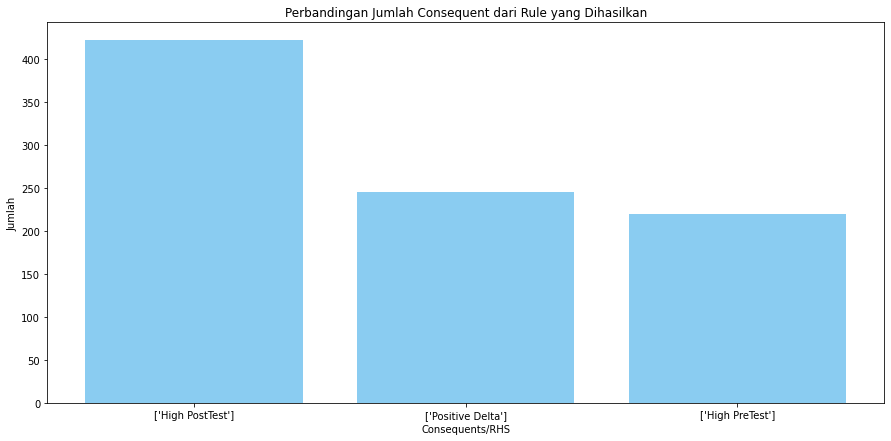

In [48]:
#Visualisasi
fp_vis = pd.DataFrame(dict_fp_ct.items(), columns=['Consequents', 'Jumlah'])
plt.figure(figsize=(15,7))
plt.bar(fp_vis["Consequents"], fp_vis["Jumlah"], align='center', color="#8ACCF1")
plt.xlabel('Consequents/RHS')
plt.ylabel('Jumlah')
plt.title('Perbandingan Jumlah Consequent dari Rule yang Dihasilkan')

plt.show()

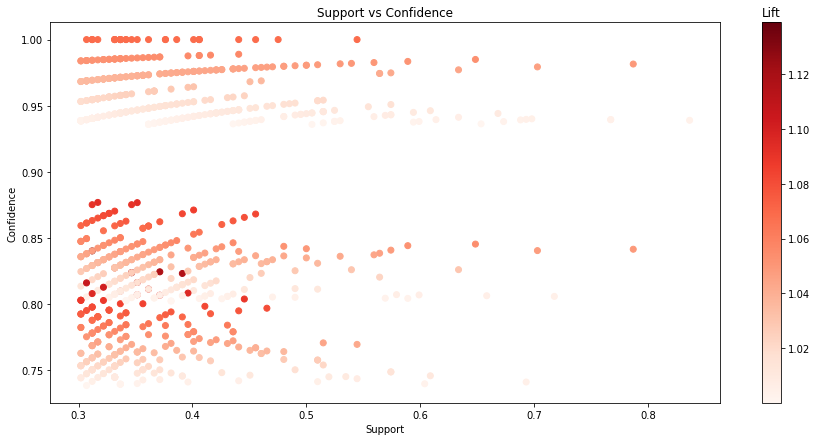

In [49]:
#Visualisasi
plt.figure(figsize=(15,7))
plt.scatter(df_rule_fp["Support"], df_rule_fp['Confidence'],c=df_rule_fp['Lift'],cmap="Reds")
yeet = plt.colorbar()
yeet.ax.set_title('Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

In [50]:
df_rule_fp

,Antecedents,Consequents,Support,Confidence,Lift
0,[Normal Stress],['High PostTest'],0.836634,0.938889,1.003469
1,[Moderate ESF],['High PostTest'],0.767327,0.939394,1.004008
2,"[Moderate ESF, Normal Stress]",['High PostTest'],0.688119,0.939189,1.003790
3,[Moderate CRF],['High PostTest'],0.767327,0.939394,1.004008
4,"[Moderate CRF, Normal Stress]",['High PostTest'],0.698020,0.940000,1.004656
...,...,...,...,...,...
882,"[High CP, Moderate CRF, Normal Depression, Nor...",['High PreTest'],0.326733,0.795181,1.078030
883,"[High PreTest, High CP, Moderate CRF, Normal D...",['High PostTest'],0.311881,0.954545,1.020202
884,"[High CP, Moderate CRF, High PostTest, Normal ...",['High PreTest'],0.311881,0.787500,1.067617
885,"[Normal Stress, High CP, High PreTest, Moderat...",['High PostTest'],0.311881,0.954545,1.020202


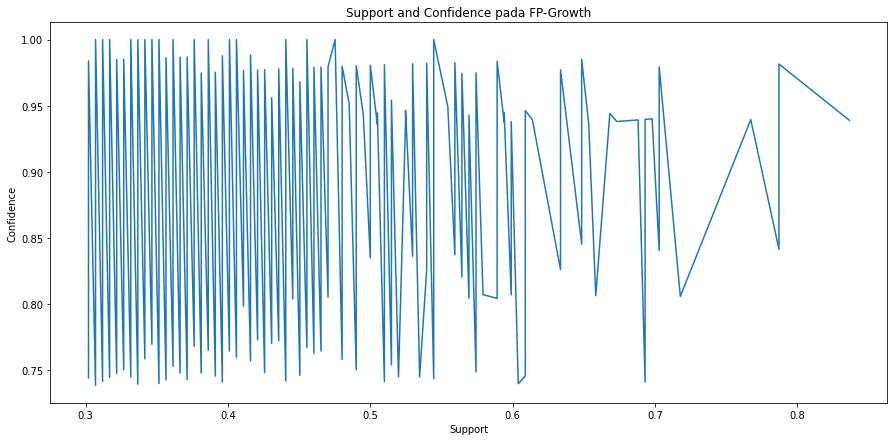

In [51]:
rel_fp = df_rule_fp.copy()
plt.figure(figsize=(15,7))
rel_fp = rel_fp.sort_values(by=['Support','Confidence'], ascending=True)
plt.plot(rel_fp['Support'],rel_fp['Confidence'])
plt.title('Support and Confidence pada FP-Growth')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()


##### Export ke Excel (Untuk nantinya divisualisasikan di streamlit)

In [52]:
writer = pd.ExcelWriter('asosiasi/visualization.xlsx')

ap_general.to_excel(writer, sheet_name='ap_general')
ap_vis.to_excel(writer, sheet_name='ap_vis')
df_rule_fp.to_excel(writer, sheet_name='df_rule_fp')
fp_vis.to_excel(writer, sheet_name='fp_vis')
apriori_pretest.to_excel(writer, sheet_name='apriori_pretest')
apriori_posttest.to_excel(writer, sheet_name='apriori_posttest')
apriori_delta.to_excel(writer, sheet_name='apriori_delta')
apriori_general.to_excel(writer, sheet_name='apriori_general')
combinesion.to_excel(writer, sheet_name='ap_combine')
rule_ap_general.to_excel(writer, sheet_name='rule_ap_general')
rule_ap_pretest.to_excel(writer, sheet_name='rule_ap_pretest')
rule_ap_posttest.to_excel(writer, sheet_name='rule_ap_posttest')
rule_ap_delta.to_excel(writer, sheet_name='rule_ap_delta')
rel_fp.to_excel(writer, sheet_name='rel_fp')

writer.save()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1d50ba51-483e-487a-a800-81d0e24d7a16' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>